In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# import jupyterthemes as jt
import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)
# from jupyterthemes.stylefx import set_nb_theme
# !jt -t monokai
# set_nb_theme('monokai')

In [2]:
df= pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

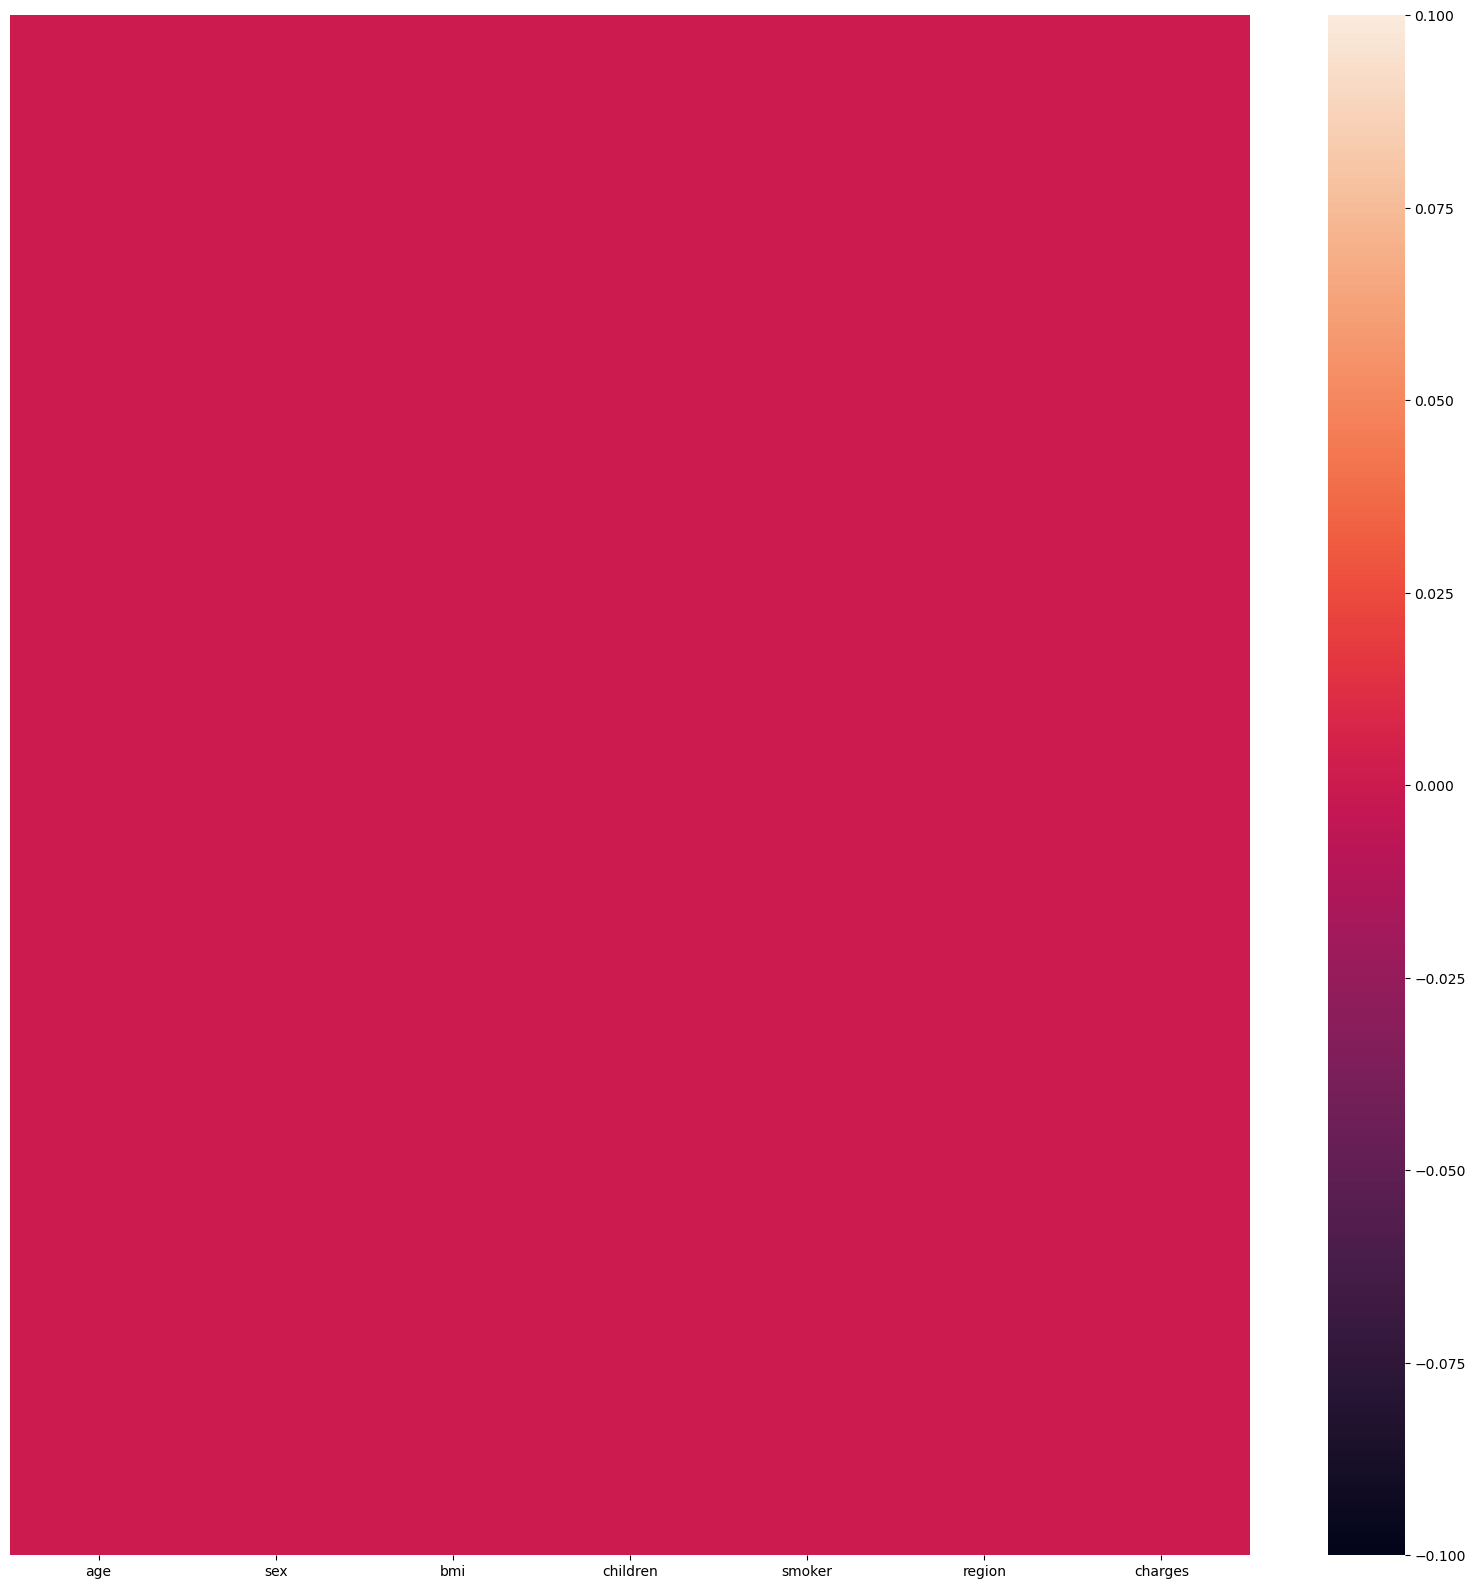

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
le=LabelEncoder()

In [10]:
df['region']= le.fit_transform(df['region'])

In [11]:
df_region=pd.get_dummies(df['region'],drop_first=True)
df_region

,1,2,3
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [12]:
df['sex']=df['sex'].apply(lambda x:0 if x =='female' else 1 )
# df['sex']= df['sex'].apply(lambda x: 0 if x=='female' else 1)

In [13]:
df_insurance= pd.concat([df,df_region],axis=1)
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,1,2,3
0,19,0,27.900,0,yes,3,16884.92400,0,0,1
1,18,1,33.770,1,no,2,1725.55230,0,1,0
2,28,1,33.000,3,no,2,4449.46200,0,1,0
3,33,1,22.705,0,no,1,21984.47061,1,0,0
4,32,1,28.880,0,no,1,3866.85520,1,0,0


In [14]:
df['smoker']=le.fit_transform(df['smoker'])



In [15]:
df['sex']= le.fit_transform(df['sex'])
# df['sex']= df['sex'].apply(lambda x: 0 if x=='female' else 1)

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,1,2,3
0,19,0,27.900,0,yes,3,16884.92400,0,0,1
1,18,1,33.770,1,no,2,1725.55230,0,1,0
2,28,1,33.000,3,no,2,4449.46200,0,1,0
3,33,1,22.705,0,no,1,21984.47061,1,0,0
4,32,1,28.880,0,no,1,3866.85520,1,0,0


In [18]:
print(df.info())
print(df_insurance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 62.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
 7   1         1338

In [19]:
#Grouping by region to see any relationship between region and cahrges
#seems like south east region has the highest charges and body mass index
df_region=df.groupby(by='region').mean()
df_region

,age,sex,bmi,children,smoker,charges
region,,,,,,
0,39.268519,0.503086,29.173503,1.046296,0.206790,13406.384516
1,39.196923,0.495385,29.199785,1.147692,0.178462,12417.575374
2,38.939560,0.519231,33.355989,1.049451,0.250000,14735.411438
3,39.455385,0.501538,30.596615,1.141538,0.178462,12346.937377


In [20]:
df_corr= df.corr()

In [21]:
df_corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


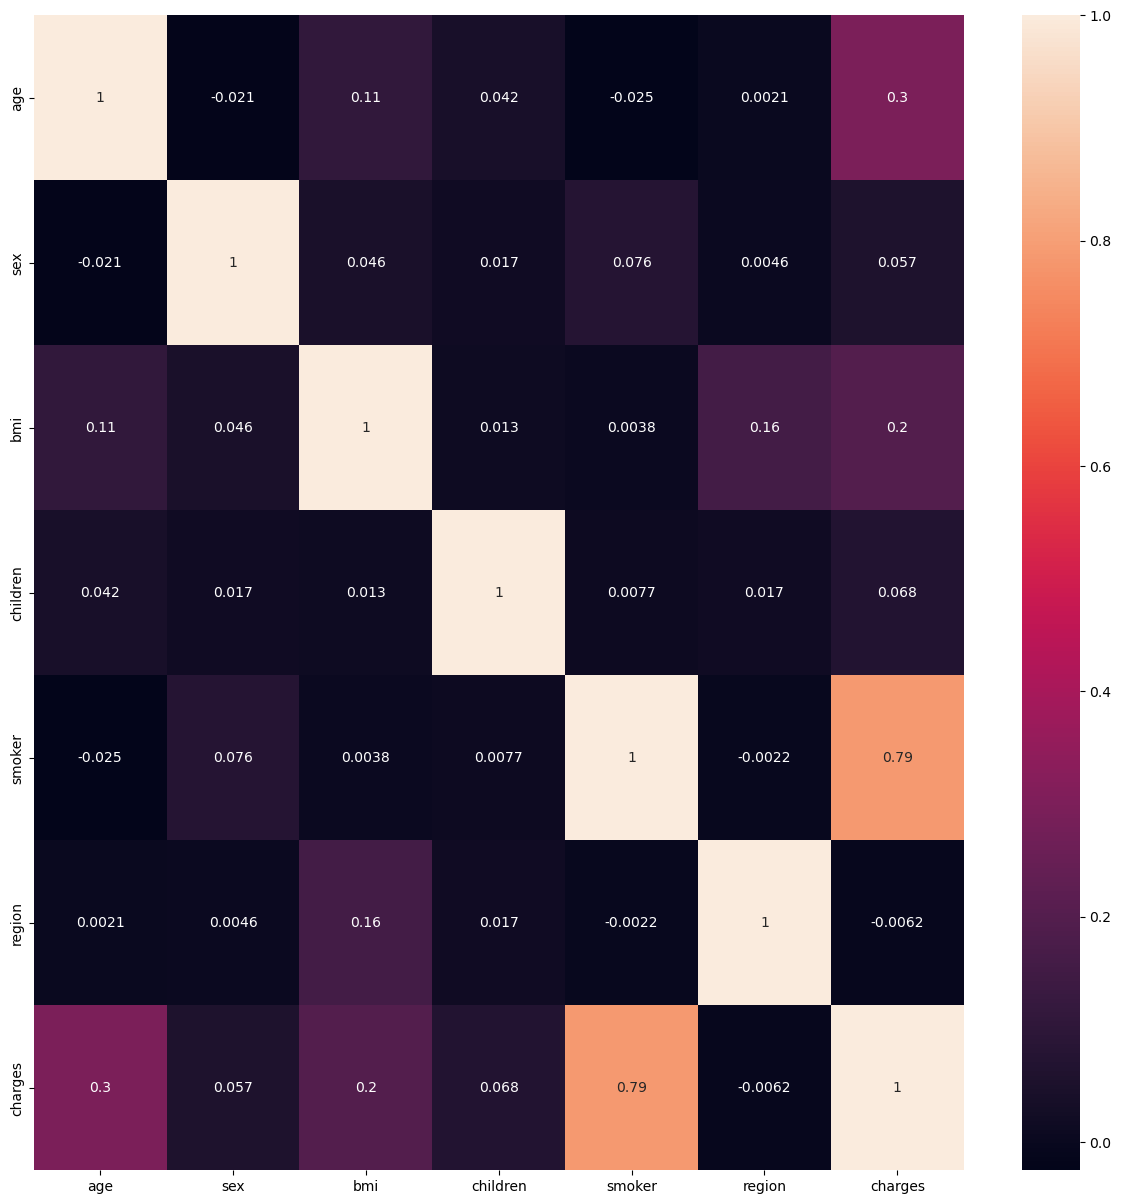

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

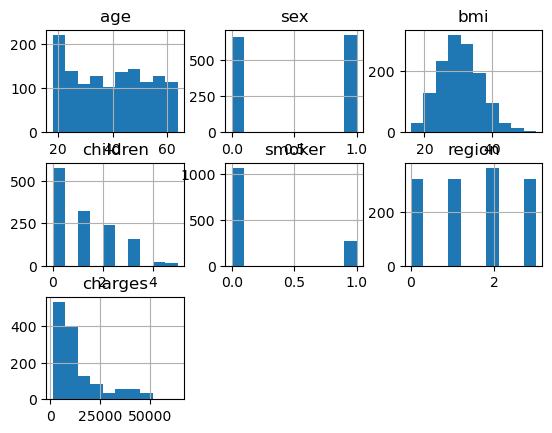

In [23]:
df.hist(bins=10)

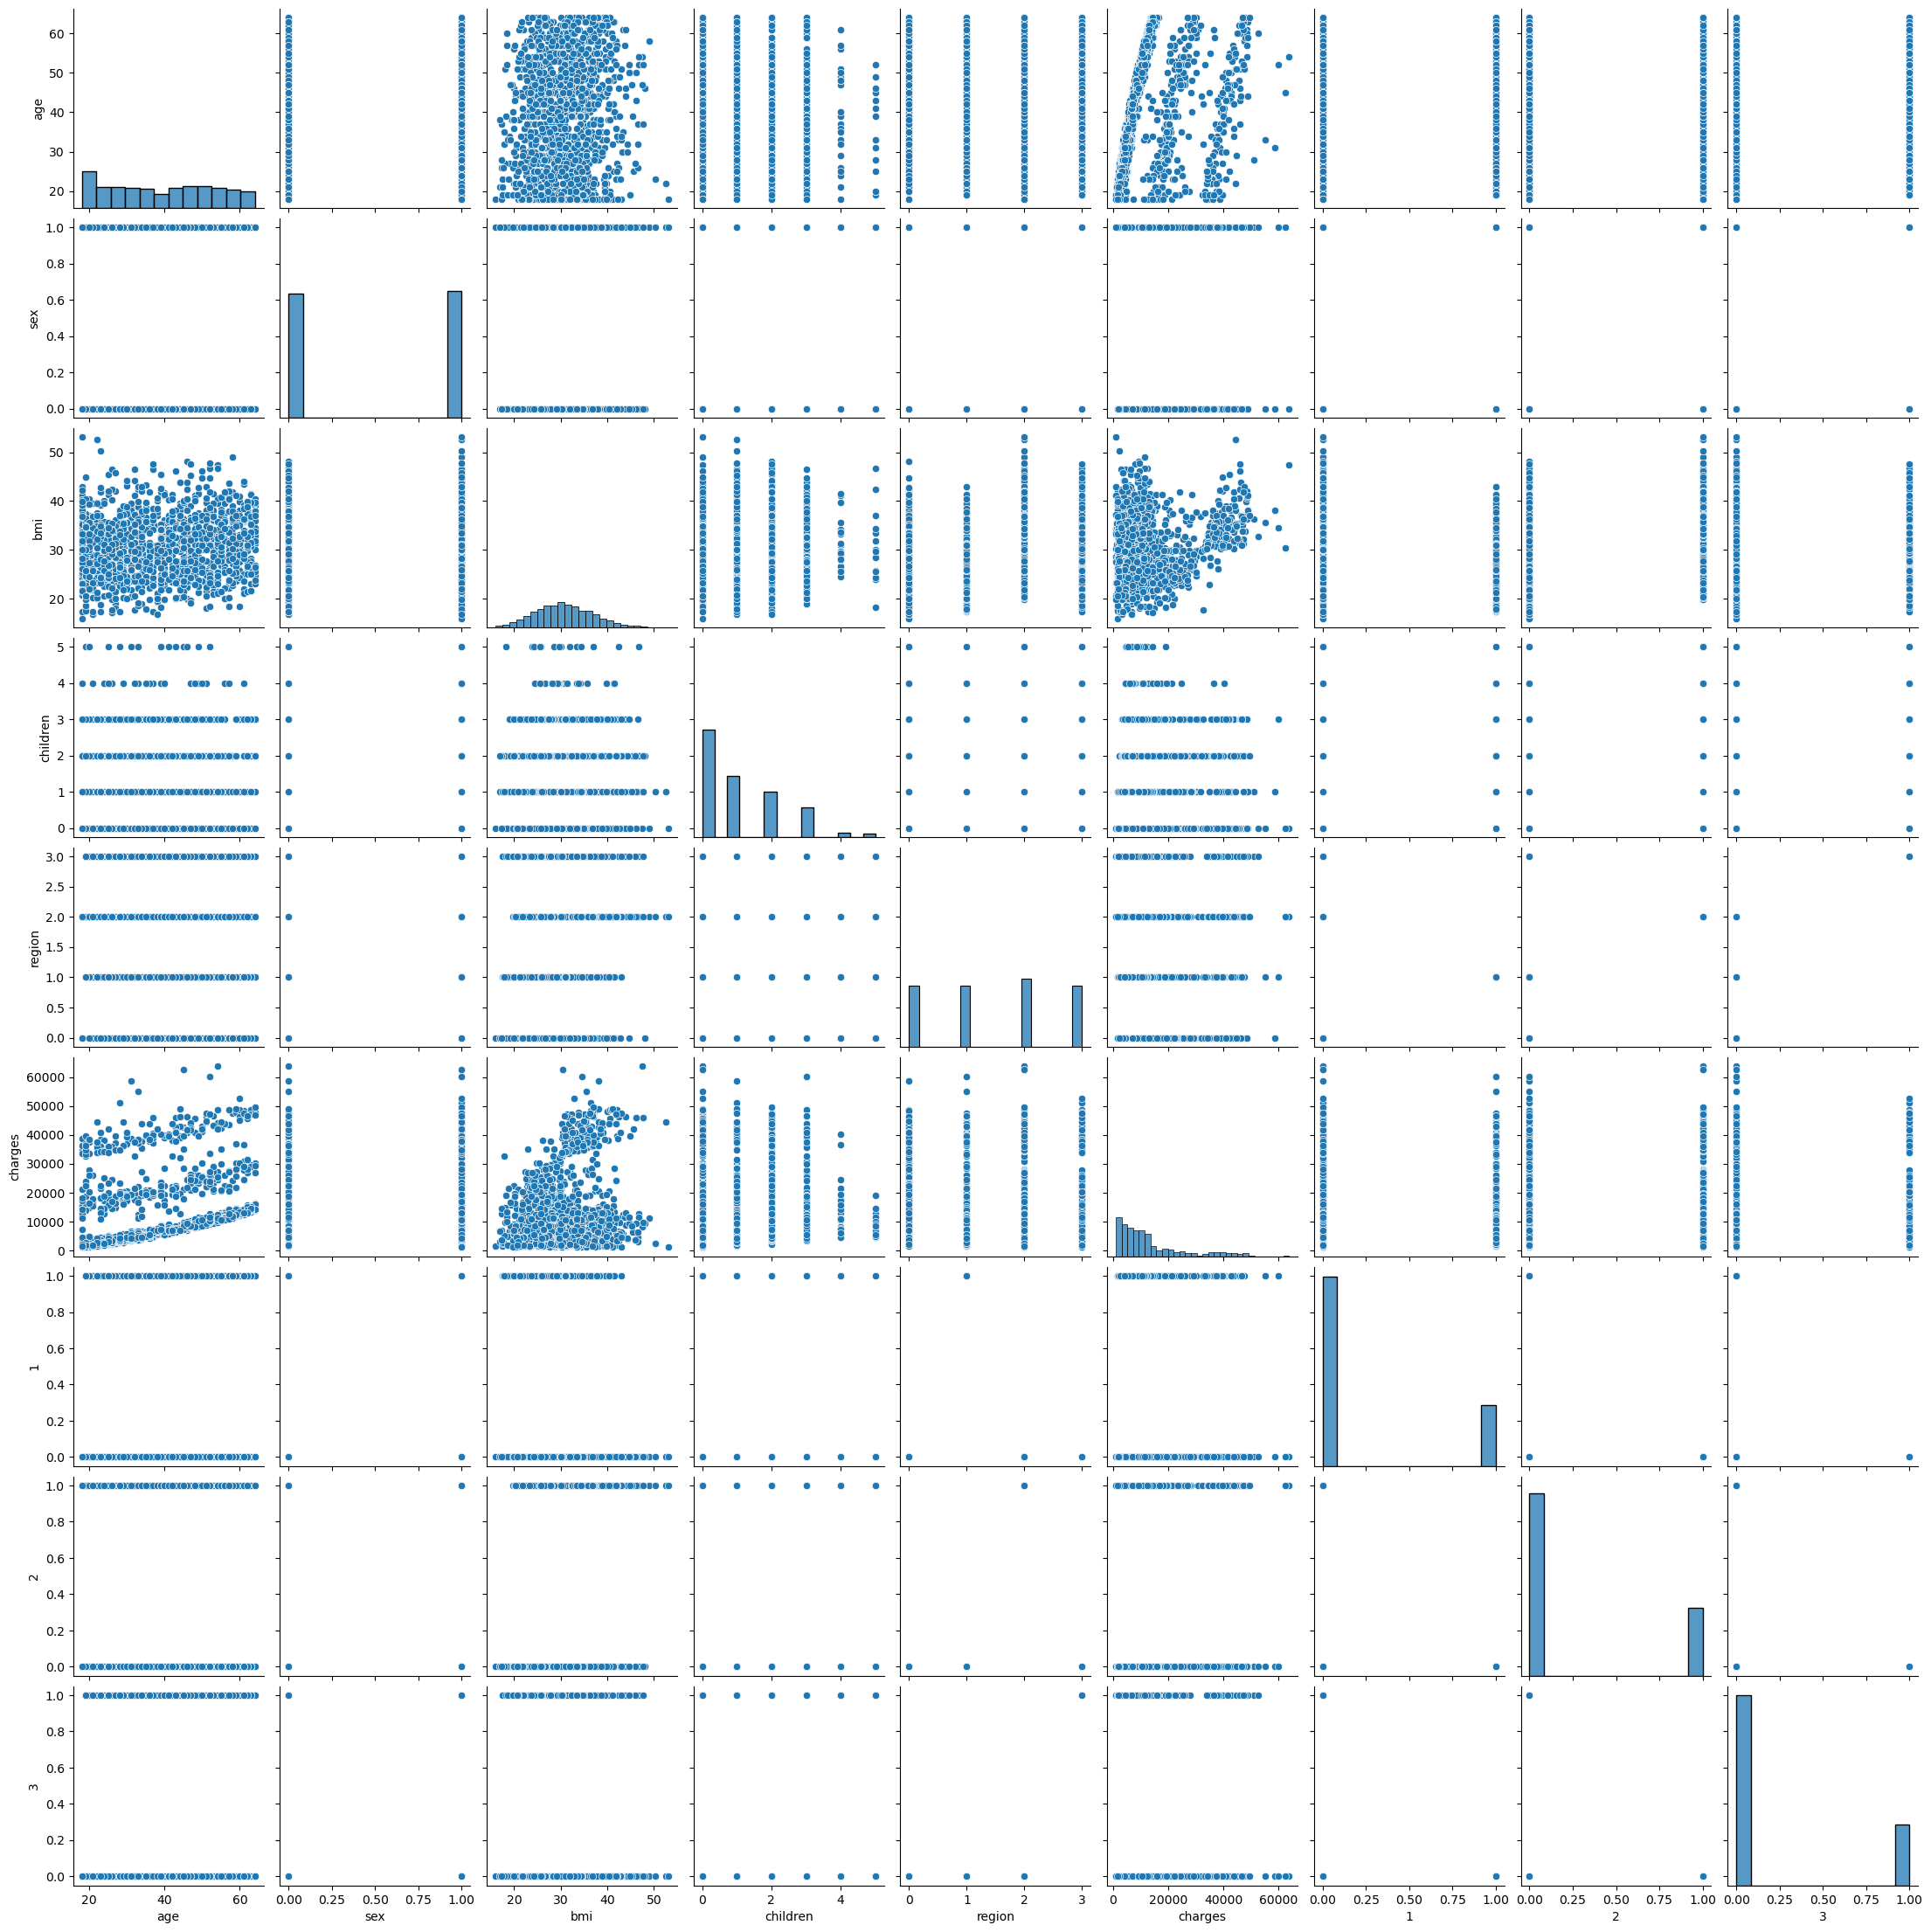

In [24]:
sns.pairplot(df_insurance)

In [28]:
df_IN= df_insurance.corr()
df_IN

,age,sex,bmi,children,charges,1,2,3
age,1.000000,-0.020856,0.109272,0.042469,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.067998,0.024806,-0.023066,0.021914
charges,0.299008,0.057292,0.198341,0.067998,1.000000,-0.039905,0.073982,-0.043210
1,-0.000407,-0.011156,-0.135996,0.024806,-0.039905,1.000000,-0.346265,-0.320829
2,-0.011642,0.017117,0.270025,-0.023066,0.073982,-0.346265,1.000000,-0.346265
3,0.010016,-0.004184,-0.006205,0.021914,-0.043210,-0.320829,-0.346265,1.000000


In [25]:
df_insurance=df_insurance.drop(columns=['region'],axis=1)
df_insurance

,age,sex,bmi,children,smoker,charges,1,2,3
0,19,0,27.900,0,yes,16884.92400,0,0,1
1,18,1,33.770,1,no,1725.55230,0,1,0
2,28,1,33.000,3,no,4449.46200,0,1,0
3,33,1,22.705,0,no,21984.47061,1,0,0
4,32,1,28.880,0,no,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,10600.54830,1,0,0
1334,18,0,31.920,0,no,2205.98080,0,0,0
1335,18,0,36.850,0,no,1629.83350,0,1,0
1336,21,0,25.800,0,no,2007.94500,0,0,1


In [26]:
y=df['charges']
X=df.drop(columns=['charges'])
y_insu= df_insurance["charges"]
X_insu=df_insurance.drop(columns=['charges'],axis=1)

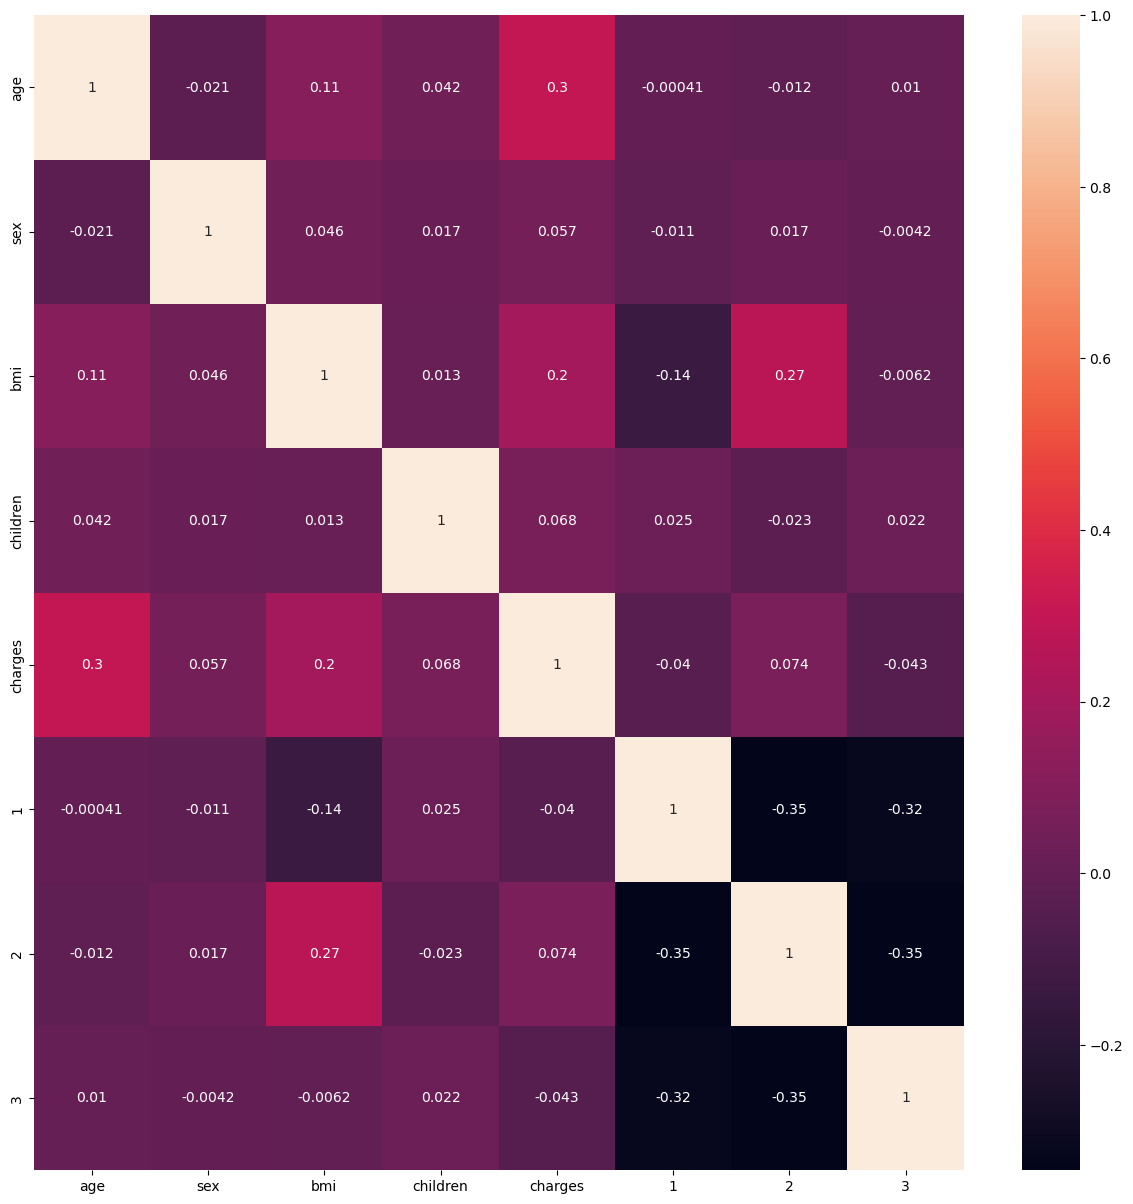

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df_IN ,annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>, <AxesSubplot:>]], dtype=object)

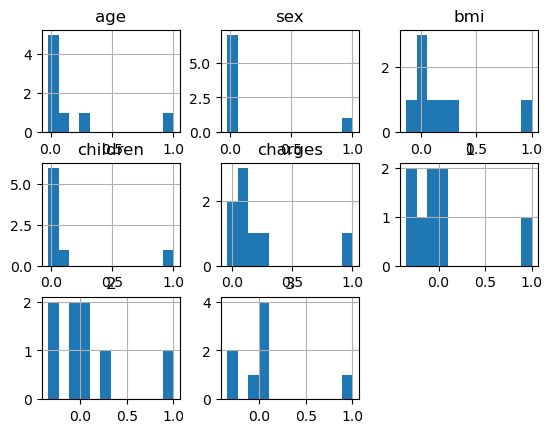

In [30]:
df_IN.hist(bins=12)

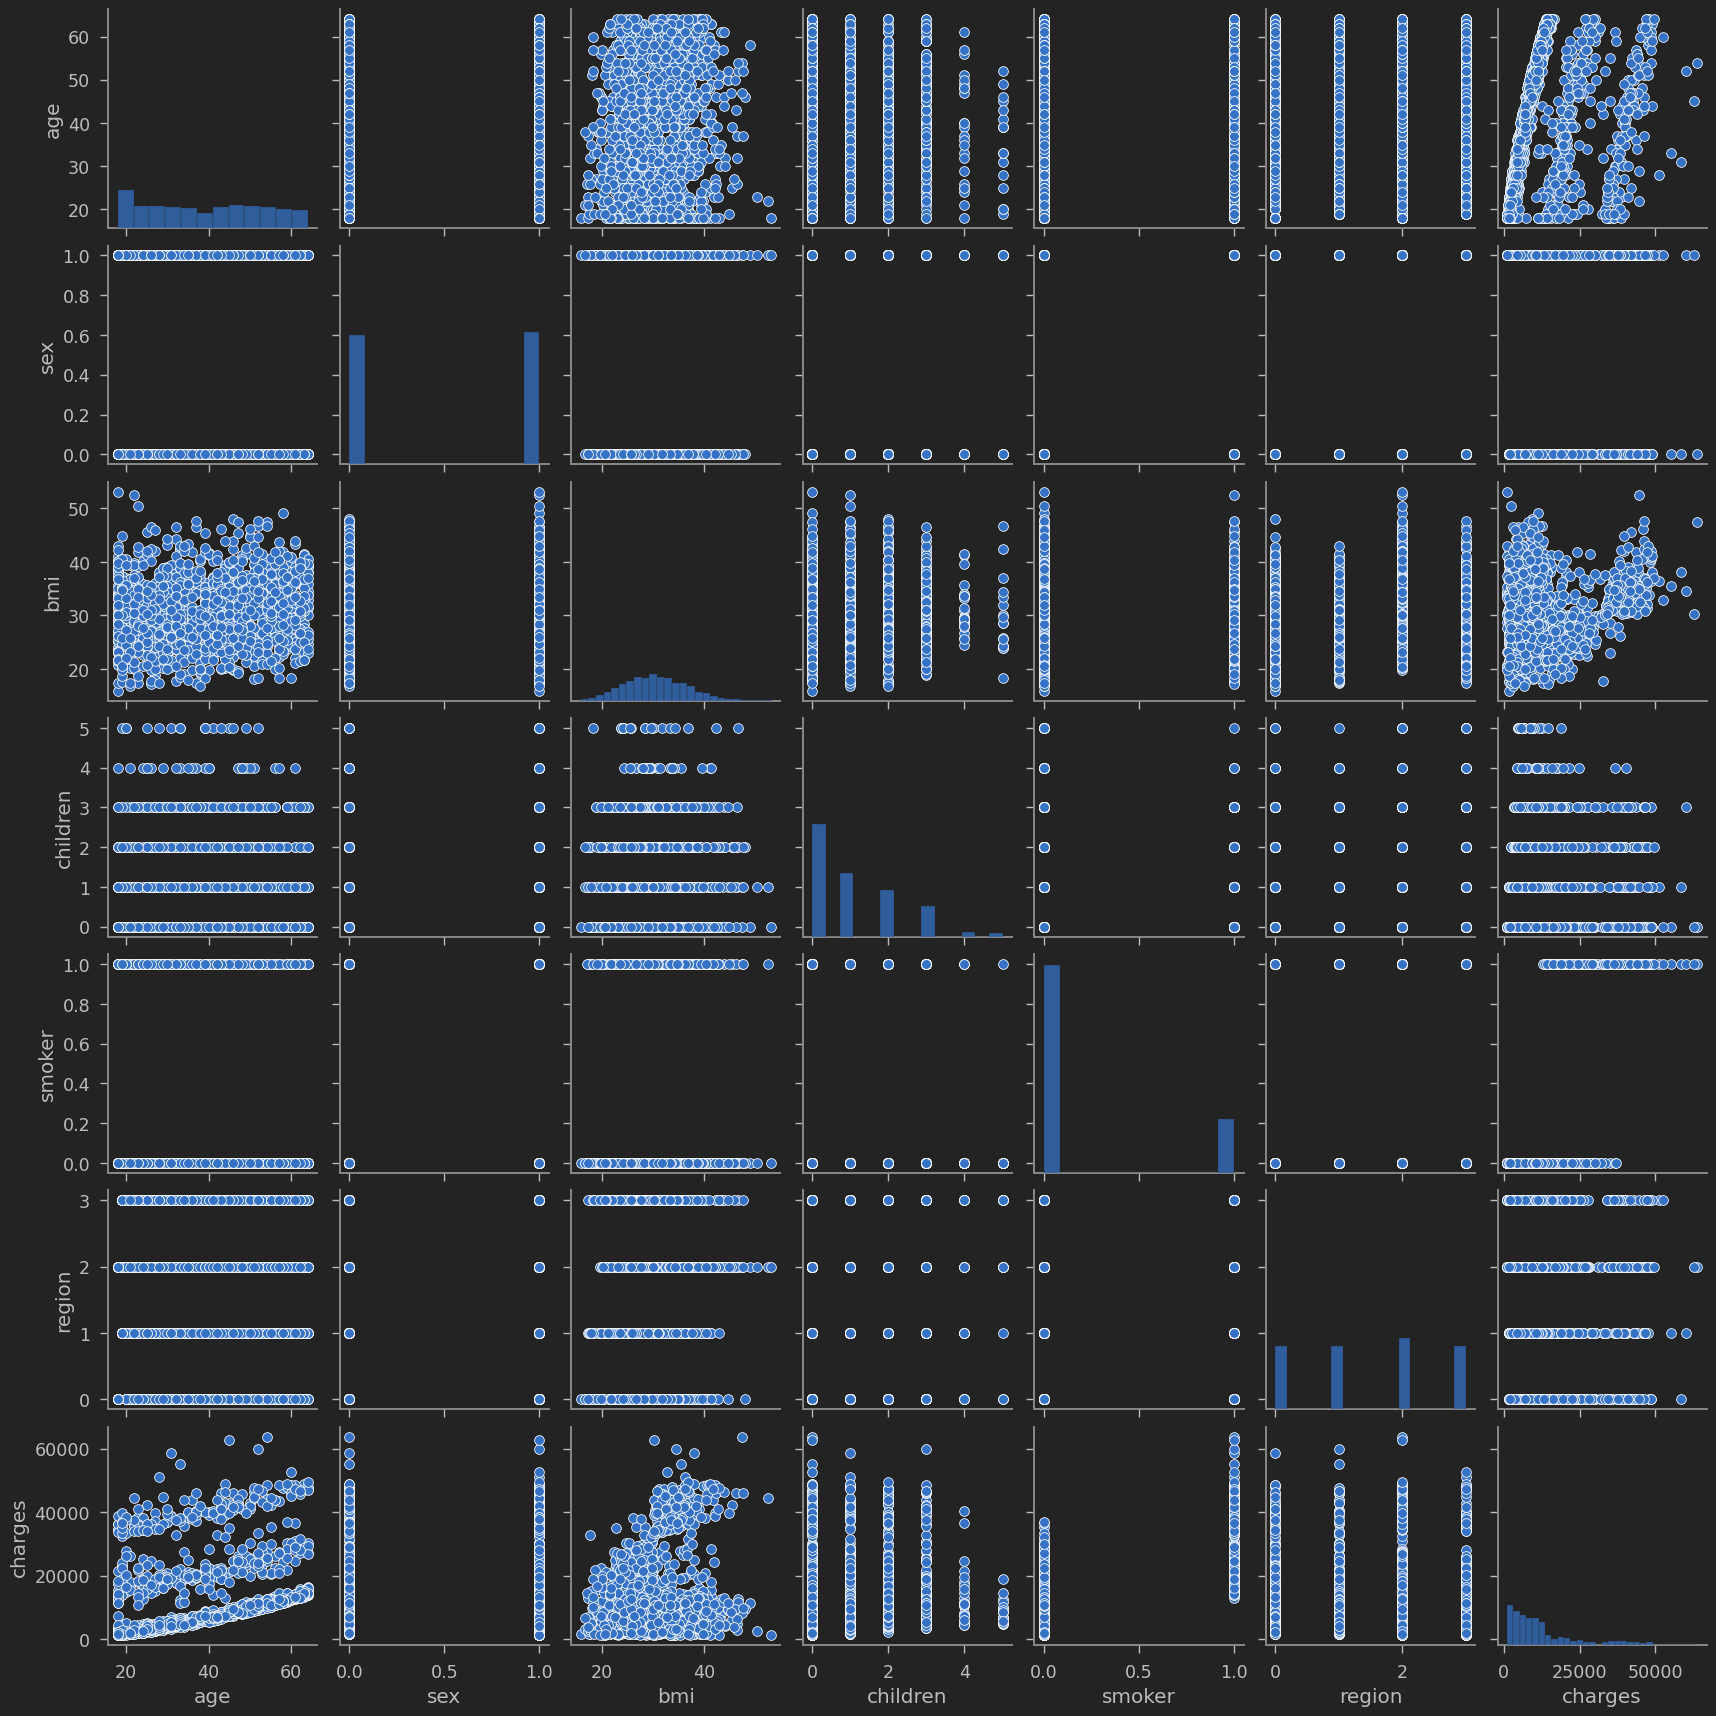

In [30]:
sns.pairplot(df)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler= StandardScaler()
X=scaler.fit_transform(X)
X_insu=scaler.fit_transform(X_insu)
y=scaler.fit_transform(y)
y_insu=scaler.fit_transform(y_insu)
print(X.shape)
print(X_insu.shape)


C:\Users\ha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: could not convert string to float: 'yes'

In [ ]:
X_train2,X_test2,y_train2,y_test2= train_test_split(X_insu,y_insu,test_size=0.25)

In [ ]:
le2=LinearRegression()

In [ ]:
le2.fit(X_train2,y_train2)
pred=le2.predict(X_test2)


In [ ]:
print("score:",le2.score(X_train2,y_train2))
score2= mean_squared_error(y_test2,pred)
score2

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25)
le=LinearRegression()
le.fit(X_train,y_train)
re= le.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix ,mean_squared_error


In [76]:
print("score:",le.score(X_train,y_train))
score= mean_squared_error(y_test,re)
score

score: 0.7476376695871124


34981399.620593384